In [10]:
import numpy as np
import matplotlib.pyplot as plt
from Dirac_FXC import Dirac_FXC
from ase.units import *
from scipy.optimize import curve_fit

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [22]:
a=3.193 # lattice parameter
t=1.10  # effective hopping parameter
delta=1.66/2  # gap
epsilon=1 # substrate dielectric contant
r0=33.875 # screening length

N=30
q_max=2

In [23]:
alpha=np.linspace(0.01,10,50)
epsilon=4.075/alpha
fxc=[]
for e in epsilon:
    dirac=Dirac_FXC(params=(a,t,delta,r0,e))
    dirac.exciton_hamiltonian(N=N,q_max=q_max)
    dirac.susceptibility_zero()
    fxc.append(dirac.fxc)
    print(dirac.alpha,fxc[-1]/dirac.delta)
fxc=np.array(fxc)/dirac.delta

fxc_corr=[]
for e in epsilon:
    dirac=Dirac_FXC(params=(a,t,delta,r0/e,e))
    dirac.exciton_hamiltonian(N=N,q_max=q_max)
    dirac.susceptibility_zero()
    fxc_corr.append(dirac.fxc)
    print(dirac.alpha,fxc_corr[-1]/dirac.delta)
fxc_corr=np.array(fxc_corr)/dirac.delta

0.010060801472232324 (-0.03482438083101169+0j)
0.21517795801835662 (-0.747161559362383+0j)
0.420295114564481 (-1.4641112959999534+0j)
0.6254122711106053 (-2.185888630445262+0j)
0.8305294276567295 (-2.9127238478107067+0j)
1.035646584202854 (-3.6448639336234128+0j)
1.2407637407489782 (-4.382574204145908+0j)
1.4458808972951025 (-5.126140137650362+0j)
1.650998053841227 (-5.875869436712074+0j)
1.8561152103873513 (-6.632094356904385+0j)
2.0612323669334756 (-7.395174343681898+0j)
2.2663495234795996 (-8.165499026991982+0j)
2.4714666800257237 (-8.943491632569886+0j)
2.676583836571848 (-9.729612880374988+0j)
2.8817009931179722 (-10.524365454718419+0j)
3.0868181496640967 (-11.328299148018969+0j)
3.2919353062102212 (-12.14201680164539+0j)
3.4970524627563453 (-12.966181194122045+0j)
3.70216961930247 (-13.80152306056613+0j)
3.907286775848594 (-14.648850469551885+0j)
4.112403932394719 (-15.509059837281168+0j)
4.317521088940842 (-16.383148927469453+0j)
4.522638245486967 (-17.272232273455725+0j)
4.7277

In [24]:
linear=lambda x,a:a*x
popt,pcov=curve_fit(linear,alpha[alpha<4],fxc[alpha<4])

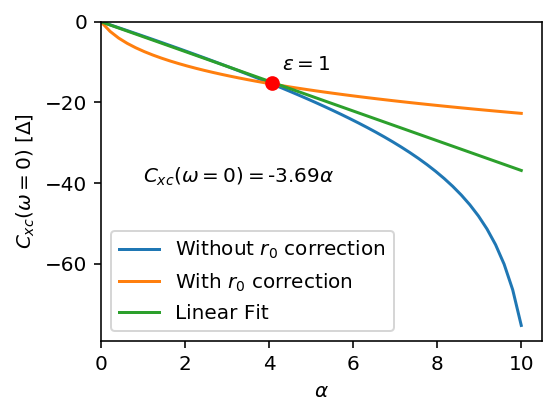

In [25]:
plt.figure(figsize=(4,3))
plt.plot(alpha,fxc,'-',label='Without $r_0$ correction')
plt.plot(alpha,fxc_corr,'-',label='With $r_0$ correction')
plt.plot(alpha,linear(alpha,*popt),'-',label='Linear Fit')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$C_{xc}(\omega=0)$ [$\Delta$]')
plt.legend(loc='best')
plt.text(1,-40,r'$C_{xc}(\omega=0)=$'+str(np.round(popt[0],2))+r'$\alpha $')
plt.xlim([0,None])
plt.ylim([None,0])
plt.scatter(4.075,-15.312,s=40,zorder=4,color='red')
plt.text(4.3,-12,r'$\epsilon=1$')
plt.tight_layout()
plt.savefig('xc.png',dpi=600)